# **Problem Statement:**
In the competitive landscape of the banking industry, maintaining customer loyalty and reducing churn rates are crucial for sustained business success. The problem statement aims to develop predictive models that leverage customer attributes to forecast whether a bank customer is likely to stay or churn. By identifying key factors influencing customer retention, the project seeks to empower banks with actionable insights to proactively engage with at-risk customers, tailor retention strategies, and ultimately enhance customer satisfaction and loyalty. 
The dataset can be found at [Kaggle](https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv/data)
## **Key Takeaway:**
This project aims to predict bank customer churn by analyzing various attributes such as demographics, account details, and transaction history. It utilizes machine learning techniques to identify customers likely to leave, enabling targeted strategies for improving retention.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [60]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Explanatory Data Analysis**
Perform Explanatory Data Analysis (EDA) / indicate how features correlate among themselves, with emphasis to the target/label one.

The dataset's statistical summary reveals key insights: Credit scores range widely with an average of 650.53, suggesting varied creditworthiness among customers. The age distribution shows customers are typically middle-aged, with an average age of 38.92. Account balances vary significantly, with some customers holding no balance and others up to 250,898.09, indicating diverse financial standings. The majority of customers have a credit card and about half are active members. Finally, a 20% churn rate highlights the importance of identifying factors contributing to customer departure.

In [61]:
# Checking the shape of the dataset
dataset.shape

(10000, 14)

In [62]:
# Checking summary of the dataset
print("Data Information:")
print(dataset.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [63]:
# Checking for missing values in the dataset
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [64]:
# Viewing stastical summary of the dataset
print("\nSummary Statistics:")
dataset.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [65]:
# Checking for target value distribution in the dataset
print("\nTarget Distribution:")
print(dataset['Exited'].value_counts())


Target Distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64


The target distribution shows a significant imbalance, with 7,963 customers not exiting (0) and 2,037 exiting (1), indicating that around 20% of the customers in the dataset have churned.

## **Data Preprocessing**
We aims to clean, transform, and prepare the data for model training and evaluation. 
- **Numeric feature scaling** ensures that all variables contribute equally to the model by standardizing their scale. 
- **Categorical feature** encoding transforms text into a machine-readable format, allowing models to understand and use this information effectively. 
- **Splitting the data** into training and testing sets enables model training on one subset and evaluation on another to assess generalization performance. This structured approach enhances model accuracy and reliability.

##### **Dividing the dataset into dependent and independent variables**

In [66]:
x = dataset.iloc[:,3:13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [99]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [67]:
y = dataset.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

#### **Encoding the categorical data**

In [76]:
# Checking unique values in categorical features
print("\nUnique Values in Categorical Features:")
for col in dataset.select_dtypes(include=['object']).columns:
    print(col, ":", dataset[col].unique())


Unique Values in Categorical Features:
Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [77]:
geography = pd.get_dummies(x['Geography'],drop_first=True)
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [78]:
gender = pd.get_dummies(x['Gender'],drop_first=True)
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [83]:
# Concatenate the DataFrames
x_encoded = x.drop(['Geography','Gender'], axis=1)
x_encoded = pd.concat([x_encoded, geography, gender], axis=1)  # Corrected axis=1 to concatenate along columns
x_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [84]:
x_encoded.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

#### **Splitting the dataset into training and test set**

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded,y,test_size=0.3,random_state=0)

#### **Feature Scaling**

In [86]:
from sklearn.preprocessing import StandardScaler
# standard scaling is based on z score to normalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [87]:
x_train

array([[-0.09792126, -0.55759842, -1.03635146, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-1.12612023,  0.01725942,  0.69700901, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-0.62230274,  3.5622161 ,  0.00366482, ..., -0.56987189,
        -0.5731713 , -1.08347268],
       ...,
       [ 0.89943174, -0.36597914,  0.00366482, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-0.62230274, -0.07855022,  1.39035319, ..., -0.56987189,
         1.74467913, -1.08347268],
       [-0.28299708,  0.87954618, -1.38302356, ...,  1.75478035,
        -0.5731713 , -1.08347268]])

In [88]:
x_test

array([[-0.55032881, -0.36597914,  1.0436811 , ...,  1.75478035,
        -0.5731713 , -1.08347268],
       [-1.31119605,  0.11306906, -1.03635146, ..., -0.56987189,
        -0.5731713 , -1.08347268],
       [ 0.57040807,  0.30468834,  1.0436811 , ..., -0.56987189,
         1.74467913, -1.08347268],
       ...,
       [ 0.35448628,  0.11306906, -1.03635146, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [ 0.42646021,  2.89154862,  1.73702529, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [ 0.82745781,  0.97535582, -0.34300727, ...,  1.75478035,
        -0.5731713 , -1.08347268]])

In [89]:
x_train.shape

(7000, 11)

In [90]:
x_test.shape

(3000, 11)

## **Data Visualization**

In [104]:
# Extract the indices used for training data
train_indices, _, _, _ = train_test_split(np.arange(len(x)), y, test_size=0.3, random_state=0)

# Convert train_indices to a list for indexing
x_train_list = train_indices.tolist()

# Extract corresponding rows from x and select the desired columns
x_categorical = x.iloc[x_train_list, 1:3]
x_visualize = x_encoded.iloc[x_train_list, 1:8]

In [105]:
x_categorical.columns

Index(['Geography', 'Gender'], dtype='object')

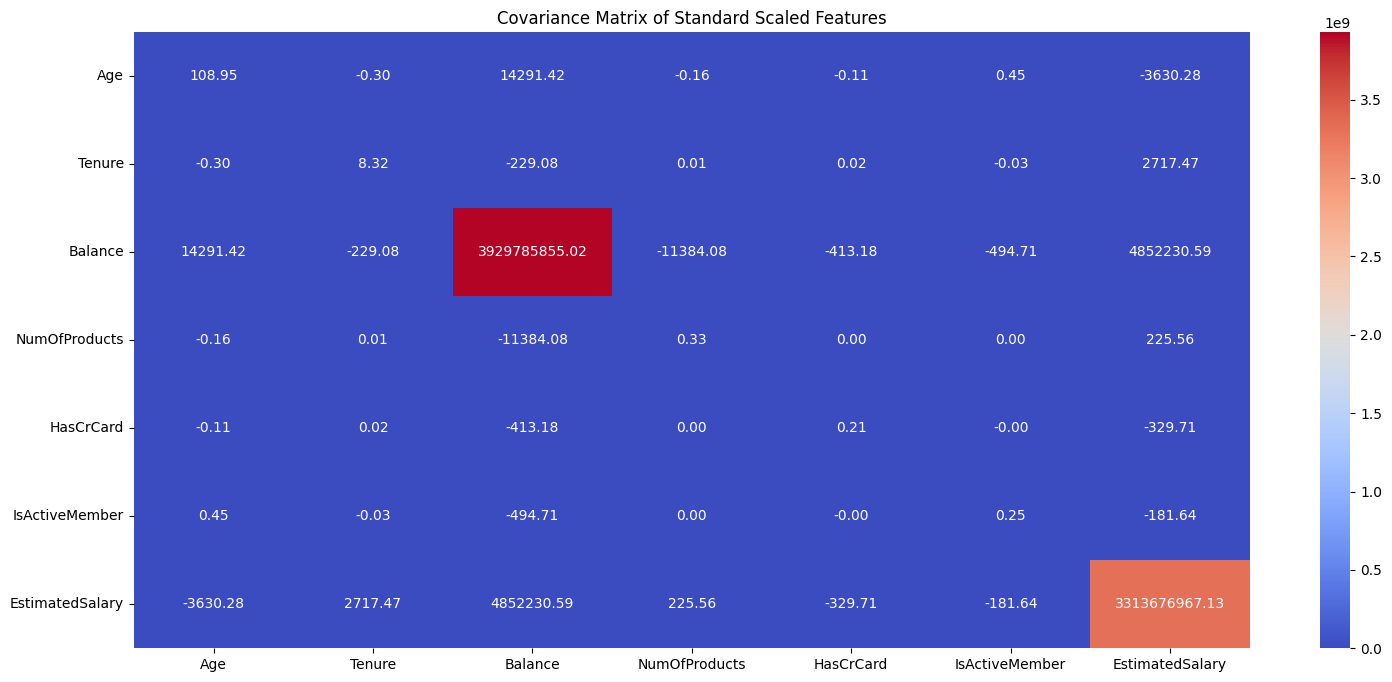

In [94]:
# Compute covariance matrix for numeric features
covariance_matrix = np.cov(x_visualize, rowvar=False)

# Create a heatmap
plt.figure(figsize=(18,8))
sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap = 'coolwarm', xticklabels=x_visualize.columns, yticklabels=x_visualize.columns)

plt.title('Covariance Matrix of Standard Scaled Features')
plt.show()

The covariance matrix visualized through the heatmap indicates the degree to which numerical variables in the dataset change together. A high positive value, such as that seen between 'Balance' and 'EstimatedSalary' suggests a stronger positive linear relationship where they increase together. Conversely, near-zero values suggest very weak linear relationships. Covariances near zero across many variables, as seen in the matrix, suggest that features do not have strong linear dependencies, which is beneficial for certain types of predictive modeling as it reduces multicollinearity concerns.

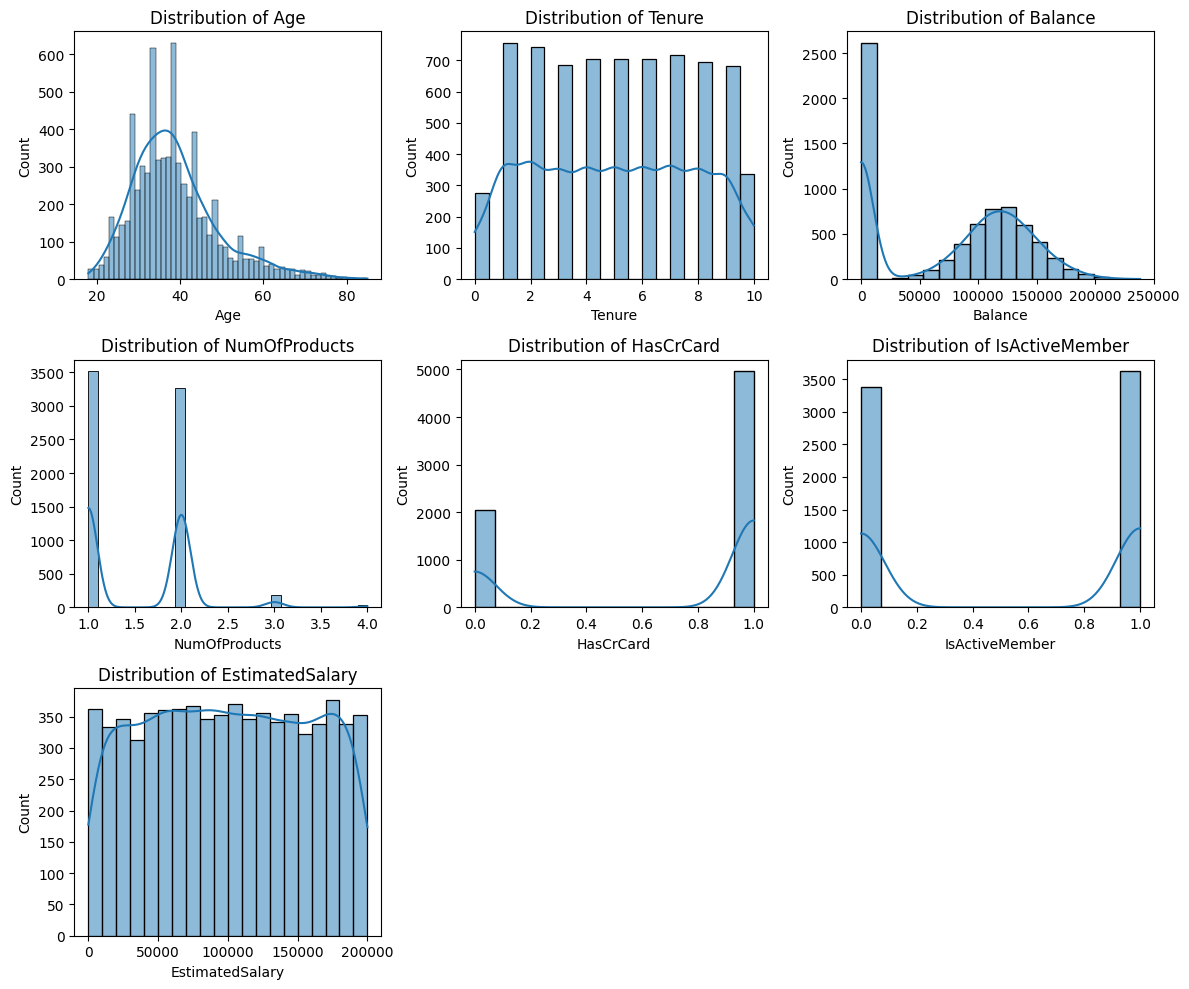

In [95]:
# Visualize the distributions of numeric features

plt.figure(figsize=(12, 10))

# Loop through each feature and plot its histogram
for i, feature in enumerate(x_visualize.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(x_visualize[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

The histograms of numeric features from the dataset reveal a variety of distributions:
- CreditScore appears normally distributed, indicating diverse financial health across customers.
- Age shows a right-skewed distribution, with a younger customer base being more common.
- Tenure is fairly uniform, suggesting no specific duration dominates customer banking relationships.
- Balance has a large peak at zero, indicating a significant number of customers have no balance, with the remainder displaying a broad distribution.
- NumOfProducts shows most customers have 1 or 2 products, with few opting for 3 or 4.
- HasCrCard indicates most customers possess a credit card.
- IsActiveMember has a bimodal distribution, implying a near even split between active and inactive members.
- EstimatedSalary is uniformly distributed, showing no particular salary range dominance among customers.

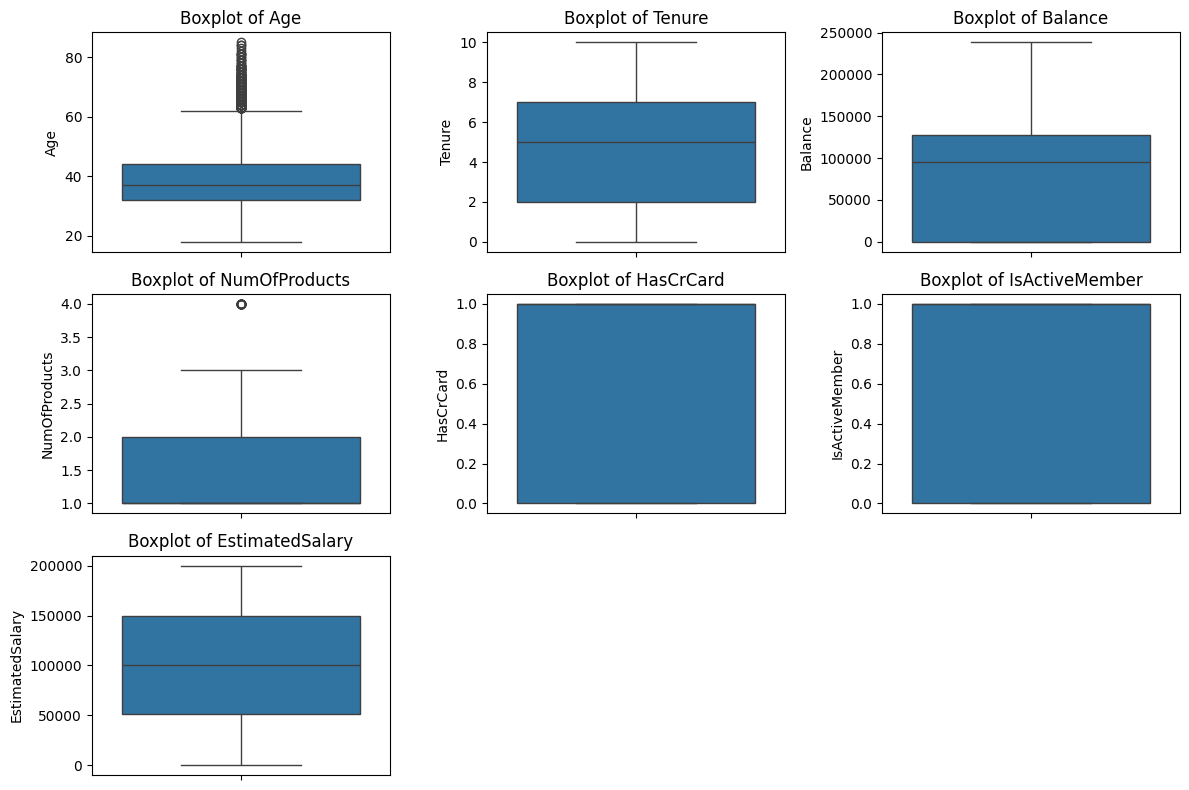

In [96]:
# Plot box plots for each numeric feature
plt.figure(figsize=(12,8))
for i, feature in enumerate(x_visualize.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=x_visualize, y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

The boxplots for each numeric feature show the distribution and presence of outliers within the dataset.
- The 'CreditScore' appears quite symmetric without extreme outliers.
- 'Age' shows a concentration between 30s to 50s, with some outliers on the upper range indicating a few older customers.
- 'Balance' has a substantial number of customers with low or zero balances, and the 'NumOfProducts' has outliers at the higher end.
- 'EstimatedSalary' is evenly distributed across the quartiles.
These visualizations are key for understanding the range and distribution of each feature and for identifying any potential outliers that may affect the predictive modeling.

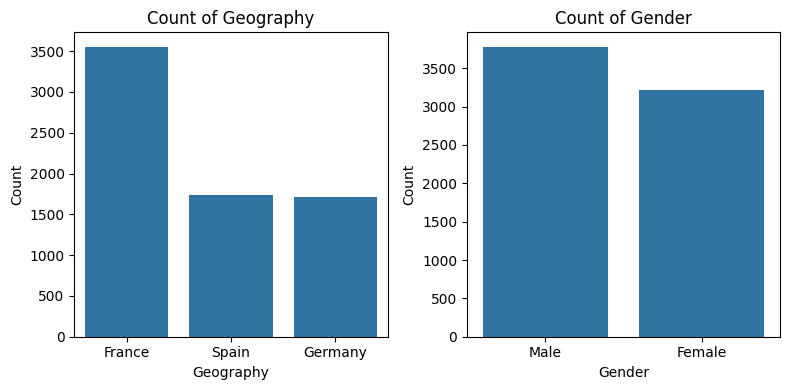

In [106]:
# Explore the distribution of categorical features
plt.figure(figsize=(8,4))
for i, feature in enumerate(x_categorical):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=x_categorical, x=feature)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

The bar charts for categorical features show the distribution among the dataset's customers. The majority are from France, followed by Spain and Germany. For gender, there is a slight imbalance, with males being more than females.

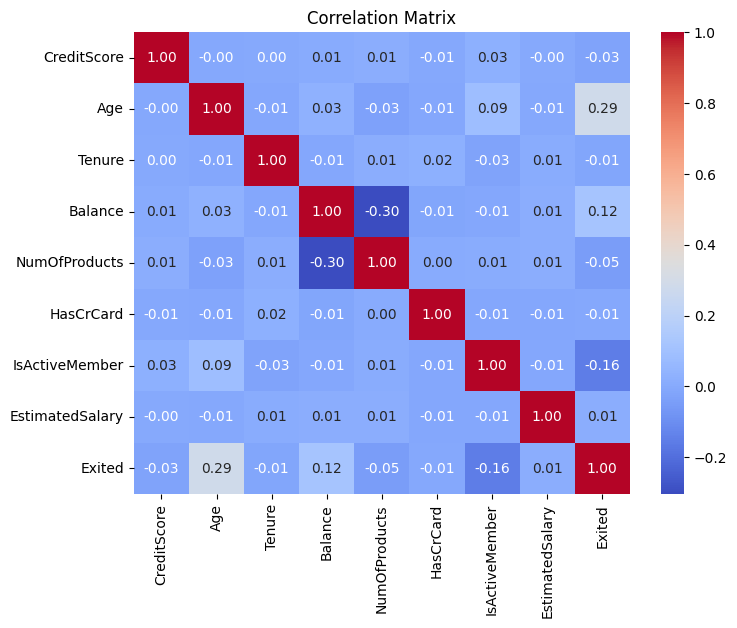

In [116]:
# Compute and visualize the correlation matrix for numeric features
numeric_df = dataset.iloc[:,3:].select_dtypes(include = ['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows the correlation coefficients between numeric features.
- Age has a moderate positive correlation with the target variable 'Exited', suggesting older customers are more likely to churn.
- 'NumOfProducts' and 'IsActiveMember' have negative correlations with 'Exited', indicating customers with more products or active memberships are less likely to leave.
- Other variables show low correlation with the target, implying no strong linear relationships with customer churn.
This information can inform feature selection and the understanding of factors that may influence churn.

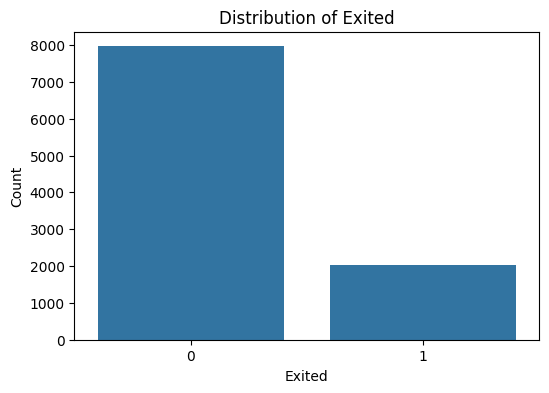

In [117]:
# Plot the distribution of the target variable (Exited)
plt.figure(figsize=(6,4))
sns.countplot(data=numeric_df, x='Exited')
plt.title('Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

The bar chart of the 'Exited' variable illustrates an imbalanced distribution between the two classes: the majority of customers (represented by '0') have not exited, while a smaller proportion (represented by '1') have.

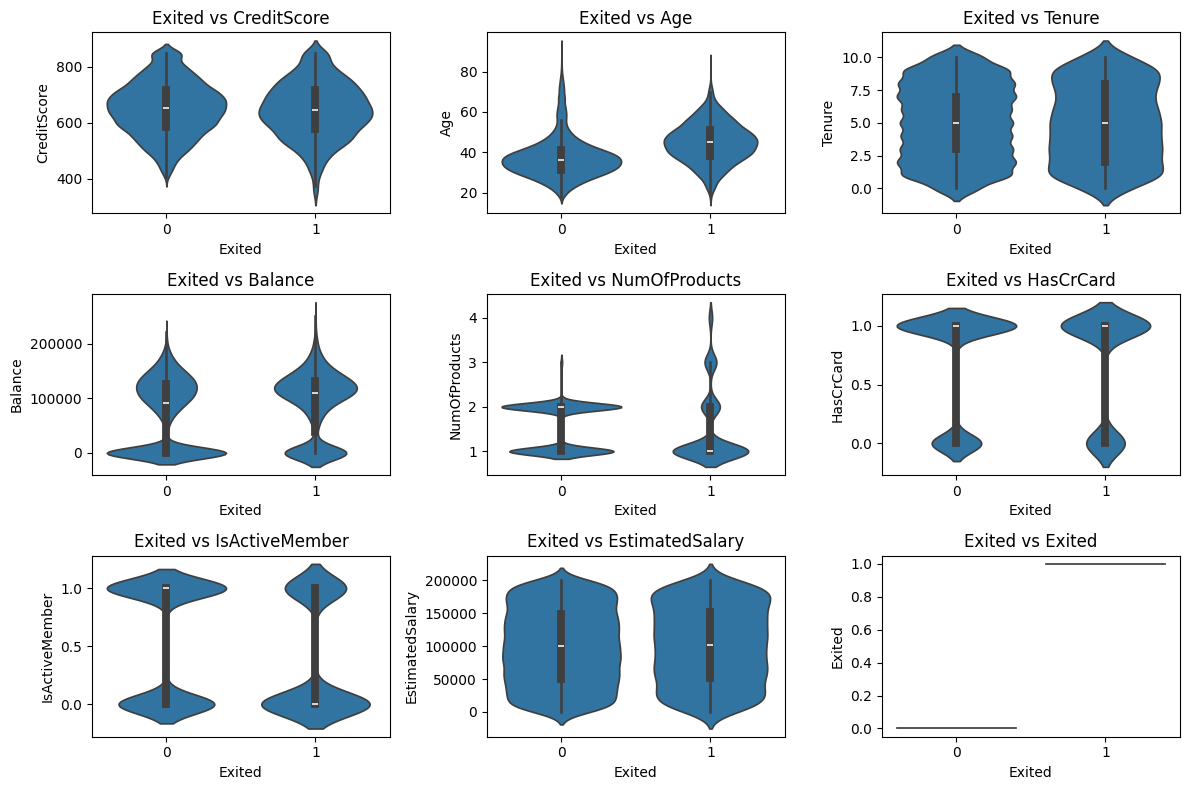

In [119]:
# Explore the relationship between the target variable and other features
plt.figure(figsize=(12,8))
for i, feature in enumerate(numeric_df):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=numeric_df, x='Exited', y=feature)
    plt.title(f'Exited vs {feature}')
plt.tight_layout()
plt.show()

The violin plots illustrate differences in numeric feature distributions between customers who exited and those who didn't.
- The plots for 'Age' and 'Balance' indicate that customers who exited tend to be older and have higher bank balances, respectively.
- 'NumOfProducts' shows that customers with fewer products are more likely to churn.
- 'IsActiveMember' suggests that inactive members are more likely to leave the bank.
- The 'CreditScore', 'Tenure', 'HasCrCard', and 'EstimatedSalary' distributions appear relatively similar for both groups, indicating these features might have less impact on the likelihood of exiting.

## **Artificial Neural Network Training and Evaluation**

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU      
from tensorflow.keras.layers import Dropout

In [121]:
# Initialising the ANN
classifier = Sequential()

In [122]:
# Adding the input layer 
classifier.add(Dense(units=11,activation='relu'))

In [123]:
# First Hidden Layer
classifier.add(Dense(units=6,activation='relu'))
# Adding the Dropout layer
classifier.add(Dropout(0.2))

In [124]:
# Second Hidden Layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [125]:
# Output Layer(binary classification)
classifier.add(Dense(units=1,activation='sigmoid'))

In [126]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [127]:
# Early stopping
import tensorflow
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [128]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [129]:
# validation_split=0.33 means 67% of the data will be used for validation
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 1000,callbacks=earlyStopping)

Epoch 1/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7895 - loss: 0.4966 - val_accuracy: 0.8031 - val_loss: 0.4175
Epoch 2/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.8167 - loss: 0.4276 - val_accuracy: 0.8373 - val_loss: 0.3879
Epoch 3/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.8304 - loss: 0.3909 - val_accuracy: 0.8312 - val_loss: 0.3939
Epoch 4/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.8151 - loss: 0.4068 - val_accuracy: 0.8425 - val_loss: 0.3747
Epoch 5/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.8279 - loss: 0.4046 - val_accuracy: 0.8421 - val_loss: 0.3794
Epoch 6/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.8388 - loss: 0.3730 - val_accuracy: 0.8412 - val_loss: 0.3710
Epoch 7/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8278 - loss: 0.3888 - val_accuracy: 0.8377 - val_loss: 0.3764
Epoch 8/1000
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8340 - l

In [130]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'model accuracy')

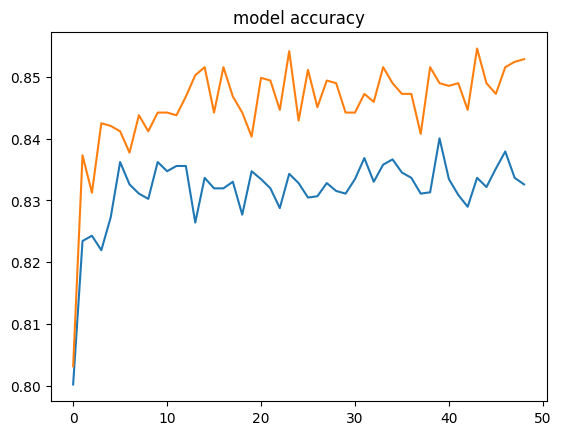

In [131]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')

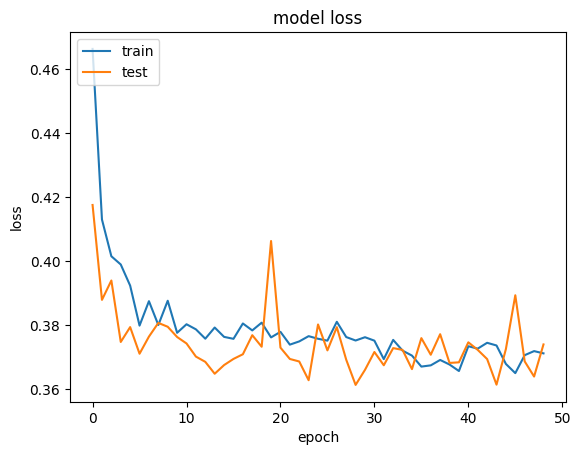

In [132]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### **Making Prediction & Evaluating Model**

In [133]:
# predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [134]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2312,   67],
       [ 347,  274]], dtype=int64)

In [135]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.862